# Introduction

Welcome! In this set of tutorials you will learn about image classification using quantized neural networks (QNNs), and what kind of computations take place.

## What We Are Trying To Do

For the purposes of this tutorial, we will view the QNN as a gray box. We will put in an image, do some operations, and get out a *classification result* which tells us what the QNN thinks this image is. The twenty-thousand feet view of how this goes is something like this:

1. We put in an image in the form of pixels, i.e. an array of numbers.
2. We multiply those pixel values (numbers) with some other numbers, which are the neural network weights, add them together, and perform some other simple operations.
4. We will repeat step 2 a couple of times with different weights.
3. At the end, we will obtain an array of numbers, one number for each class that the QNN knows about. The class with the largest number is the QNN's best guess on what the image is, the second largest is the second best guess, and so on.

We won't concern ourselves with *where* the weights come from -- this tutorial will simply provide you with several pre-trained QNNs for that purpose. If you'd like to know more about neural networks in general, [here](https://github.com/stephencwelch/Neural-Networks-Demystified) is a popular tutorial in Jupyter Notebook form with accompanying YouTube videos, alongside countless other resources on the Internet.

## OK, Let's Do It!

We'll start with a classical example in neural networks: classifying 28x28 grayscale images of digits (0 to 9). Let's load an image and see what it looks like first.

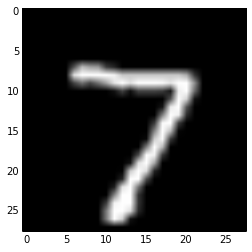

In [85]:
from PIL import Image
from matplotlib.pyplot import imshow
import numpy as np

# load image using PIL
img = Image.open("7.png")
# convert to black and white
img = img.convert("L")
# convert to numpy array
img = np.asarray(img)
# display
% matplotlib inline
imshow(img, cmap='gray')

Looks like a seven to me, but to get a useful reminder of what images look like to a computer by default, let's have a look at the numpy array itself:

In [86]:
print(img.shape)
img

(28, 28)


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

It's all just numbers in a 28x28 array! Now let's see what the neural network says about this data. We will start by loading the QNN from the file it is stored in which is a [Python Pickle](https://wiki.python.org/moin/UsingPickle).

In [87]:
import pickle

qnn = pickle.load(open("mnist-w1a1.pickle", "rb"))
qnn

[BipolarThresholdingLayer,
 FullyConnectedLayer,
 BipolarThresholdingLayer,
 FullyConnectedLayer,
 BipolarThresholdingLayer,
 FullyConnectedLayer,
 BipolarThresholdingLayer,
 FullyConnectedLayer,
 LinearLayer]

As you can see, the QNN consists of several *layers*. The QNN we loaded seems to contain three types of layers: BipolarThresholding, FullyConnected and Linear. We will cover what all these do in more detail later on. Right now, let's just see if it works! We will define a simple function to run the QNN layer by layer. We will pass the image as the input to the first layer, passing the output of each layer as the input of the next one, and return the output from the final layer like this:

In [89]:
def inference(nn, input_img):
    activations = input_img
    for layer in nn:
        activations = layer.execute(activations)
    return activations

# get the predictions array
res = inference(qnn, img)
# return the index of the largest prediction
winner_ind = np.argmax(res)
print(res)
print("The QNN predicts this is a %d" % winner_ind)

[ -4.22489643e-03  -9.47696529e-01  -5.63656226e-01  -4.29998435e-01
  -2.10290406e-01  -1.75468760e+00  -3.00302663e+00   8.65674712e+00
  -3.76429997e+00   1.67605694e+00]
The QNN predicts this is a 7


And our first image classification with a QNN is a success! In the following section, we will take a closer look at the computation that is taking place inside the .execute() functions for this network, and later we will cover more advanced types of networks.